In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5,5,0.25)

In [5]:
print(xs)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


In [6]:
 ys = f(xs)
print(ys)

[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


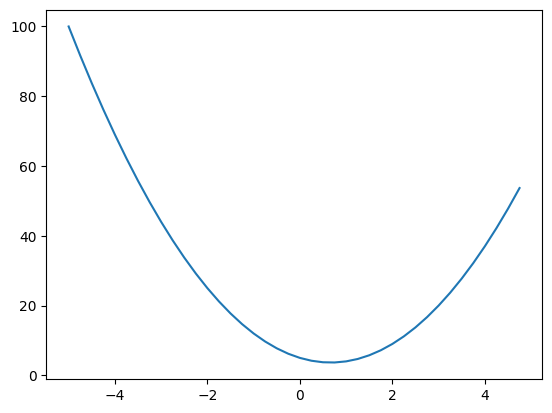

In [7]:
plt.plot(xs,ys)

In [8]:
h=0.00009
a = 3
(f(a+h)-f(a))/h

14.000270000025239

In [25]:
class Value:
    def __init__(self,data, _children=(),_op="",label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),"+")
        return out
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),"*")
        return out
    def tanh(self):
        n = self.data
        x = (math.exp(2*n) - 1) / (math.exp(2*n) + 1)
        out = Value(x,(self,),"tanh")
        return out

a = Value(2.0,label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b ; e.label="e"
d= e + c; d.label="d"
f = Value(-2.0,label="f")
L = d * f; L.label="L"


In [10]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [11]:
# !pip install graphviz

In [12]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
 
    dot = Digraph(format="svg", graph_attr={'rankdir': 'LR'}) # LR = Left to Right
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')

        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

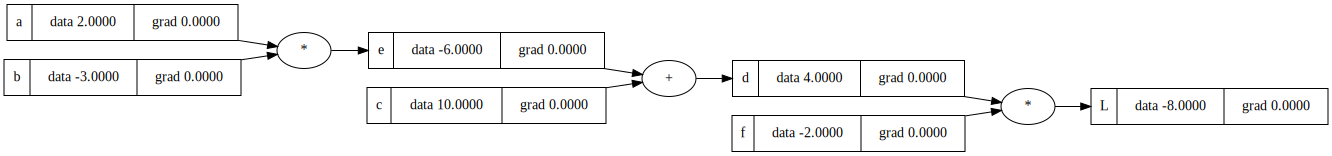

In [13]:
draw_dot(L)

### time to fill up the grad and do back propagation manualy

In [14]:
# for L node
# derivative of L w.r.t L (if I change L by a tiny amount of h how much does L change)
# dL/ dL = 1 

In [15]:
L.grad = 1.0

In [16]:
# now for the node d and f
# dL/dd = ? and dL/df ?
# L = d*f =
#  dL/ dd = f = -2.0 and dL/df = d = 4.0
d.grad = -2.0
f.grad = 4.0

In [17]:
# Now for the node c and e
# d = c + e
# dL/dc and dL/de
# using chain rule by looking at the equation 
# dL/dc = dL/dd x dd/dc (dL/dd = -2.0 from previous step)
#       = -2.0 x d/dc (c + e) = -2.0 x 1 = -2.0
# dL/dc = 12.0
# dL/de = dL/dd x dd/de = -2.0 x 1 = -2.0 
c.grad = -2.0
e.grad = -2.0

In [18]:
# Now calculating for a , b
# a * b = e
# dL/da = ? and dL/db = ?
# again using a chain rule now
# by looking at the equvalent equation
# dL/da = dL/de * de/da = -2.0 * d/da (ab) = -2.0 * b = -2.0 * -3.0 = 6
# dL/db = dL/de * de/db = -2.0 * d/db (ab) = -2.0 * a = -2.0 * 2.0 = -4.0
a.grad = 6.0
b.grad = -4.0

In [19]:
# Test the derivative numericals manually

def lol():

    h= 0.001
    
    a = Value(2.0,label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b ; e.label="e"
    d= e + c; d.label="d"
    f = Value(-2.0,label="f")
    L = d * f; L.label="L"
    L1 = L.data

    a = Value(2.0,label="a")
    b = Value(-3.0 + h, label="b")
    c = Value(10.0, label="c")
    e = a * b ; e.label="e"
    d= e + c; d.label="d"
    f = Value(-2.0,label="f")
    L = d * f; L.label="L"
    L2 = L.data

    print((L2 - L1) / h)

lol()

-3.9999999999995595


In [20]:
# print(np.tanh(-19))

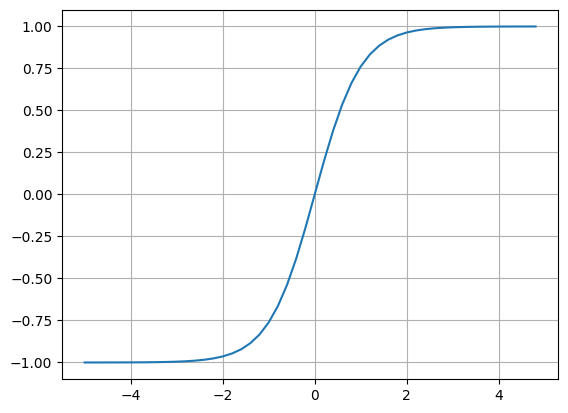

In [21]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))
plt.grid()

## Now I am gonna implement a small nueron , and use tanh as a squash func
![nueron](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

In [53]:
# inputs variables
x1 = Value(2.0,label="x1")
x2 = Value(0,label="x2")

# weights 
w1 = Value(-3.0,label="w1")
w2 = Value(1.0,label="w2")

# bias
b = Value(6.8813735870195432,label="b")
x1w1=x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2;x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b; n.label="n"

o = n.tanh();o.label="o"


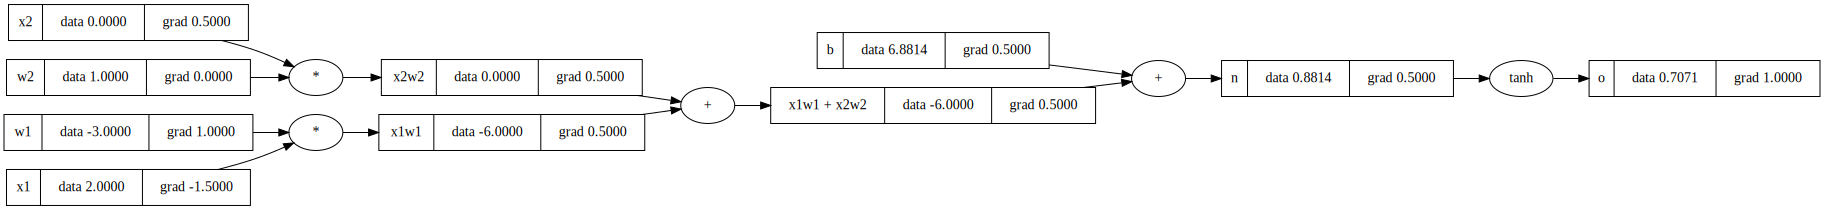

In [59]:
draw_dot(o)

In [58]:
# add grad now
o.grad = 1.0 #derivative of o w.r.t o is 1

# o= tanh(n) => d (tanh(x))/ dx = 1- tanh^2(x) => d (tanh(n)) / dn => 1-tanh^2(n) => 1- o^2 (as o = tanh(n))
n.grad =  1- (o.data)**2 #0.5

b.grad = 0.5 # do/db = do/dn x dn/db = 0.5 x 1

x1w1x2w2.grad = 0.5
x1w1.grad = 0.5 * 1.0
x2w2.grad = 0.5 * 1.0
x1.grad = 0.5 * w1.data
w1.grad = 0.5 * x1.data
x2.grad = 0.5 * w2.data
w2.grad = 0.5 * x2.data